# autoTS: Wavelet Transform


**Table of contents**
* Generating Data
* Pre-processing
    * Standardization
    * Detrend
    * Detect outliers
    * Remove outliers
    * Hypothesize over missing values
* Analysis
    * Wavelet transform
    * Significance testing 

    
Functions are available through the [Pyleoclim package](https://github.com/LinkedEarth/Pyleoclim_util/tree/Development) on the development branch.

In [1]:
import pyleoclim as pyleo
import numpy as np
import matplotlib.pyplot as plt


## Data Generation

Here,we use synthetic timeseries for demonstration purposes. 

Pyleoclim is being extended to handle LiPD files directly. For other types of data, Pyleoclim's basic object is Series, which will need to be created as a first step.

### Step 1: Generate a signal with trend, noise and missing values

This step would be replaced by opening dataset.

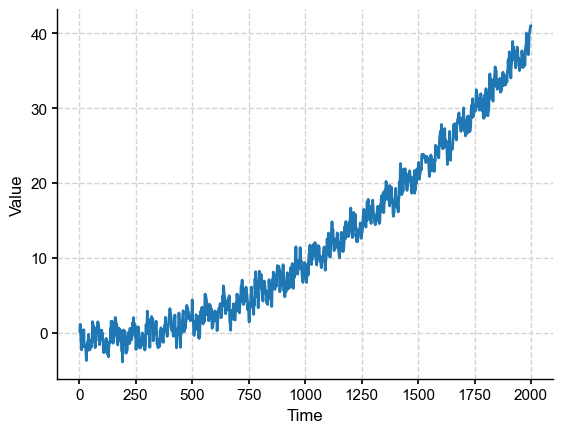

In [2]:
# Generate a mixed signal with known frequencies
freqs=[1/20,1/80]
#freqs=[1/20]
time=np.arange(2001)
signals=[]
for freq in freqs:
    signals.append(np.cos(2*np.pi*freq*time))
signal=sum(signals)

# Add outliers

#outliers_start = np.mean(signal)+5*np.std(signal)
#outliers_end = np.mean(signal)+7*np.std(signal)
#outlier_values = np.arange(outliers_start,outliers_end,0.1)
#index = np.random.randint(0,len(signal),6)
#signal_out = signal
#for i,ind in enumerate(index):
#    signal_out[ind] = outlier_values[i]

# Add a non-linear trend
slope = 1e-5
intercept = -1
nonlinear_trend = slope*time**2 + intercept
signal_trend = signal + nonlinear_trend
#signal_trend = signal_out + nonlinear_trend

#Add white noise
sig_var = np.var(signal)
noise_var = sig_var / 2 #signal is twice the size of noise
white_noise = np.random.normal(0, np.sqrt(noise_var), size=np.size(signal))
signal_noise = signal_trend + white_noise

#Remove data points
del_percent = 0.4
n_del = int(del_percent*np.size(time))
deleted_idx = np.random.choice(range(np.size(time)), n_del, replace=False)
time_unevenly =  np.delete(time, deleted_idx)
signal_unevenly =  np.delete(signal_noise, deleted_idx)


#Plot
plt.plot(time_unevenly,signal_unevenly)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

### Step 2: Create a series object for Pyleoclim


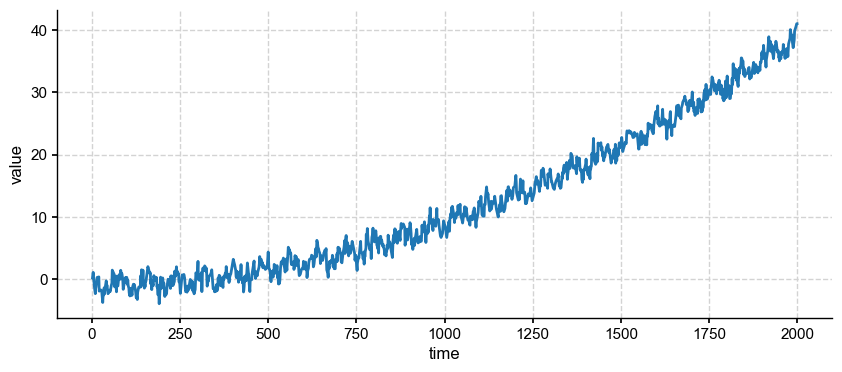

In [3]:
ts=pyleo.Series(time=time_unevenly,value=signal_unevenly)
fig,ax=ts.plot()


## Preprocessing

### Standarize

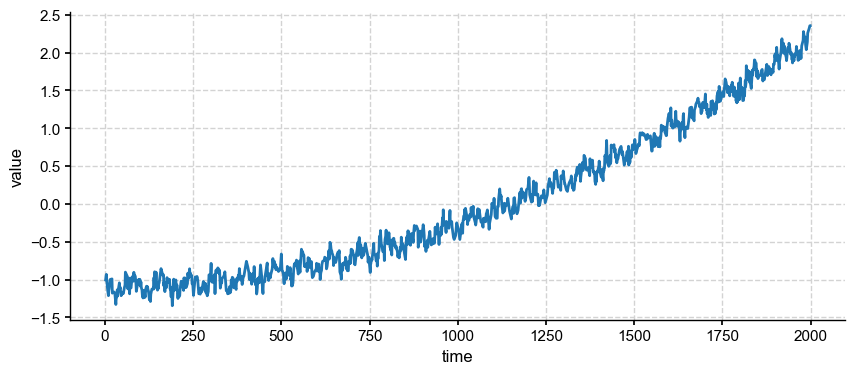

In [4]:
#%% preprocessing- standardize
ts_std=ts.standardize()
fig,ax=ts_std.plot()

### Detrend

Mode 5, Iteration 600
0 minima > 0; 9 maxima < 0.
Mode 5, Iteration 800
0 minima > 0; 9 maxima < 0.
Mode 5, Iteration 1000
0 minima > 0; 14 maxima < 0.


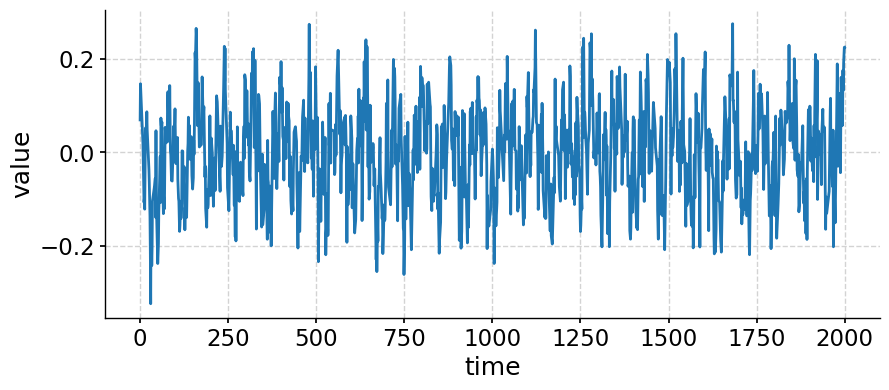

In [17]:
#%% preprocessing - detrend
    
ts_detrended=ts_std.detrend(method='emd')
fig,ax=ts_detrended.plot()

### Detect outliers and remove outliers

Based on the detected outliers, may need to remove them prior to analysis. 

In this case, the if/else could happen within the component: do nothing on else but return a similar object to be used by the next component.

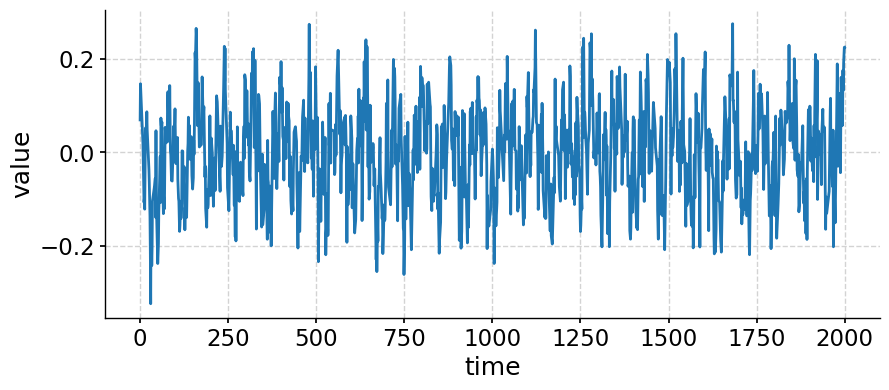

In [18]:
#%% detect and remove outliers
is_outlier=ts_detrended.detect_outliers()
if len(np.where(is_outlier==True))>0:
    ts_outliers = ts_detrended.remove_outliers()
else:
    ts_outliers=ts_detrended
fig,ax=ts_outliers.plot()

### Interpolation

This example uses a linear interpolation, other methods to achieve an evenly-spaced time series are spline interpolation, binning, and singular spectrum analysis. All methods could be equally valid and should be explored.

**Rule**: if the method spectral analysis is 'Lomb-Scargle' or 'WWZ', this step should be skipped (or same timeseries returned); else, this step is necessary. 

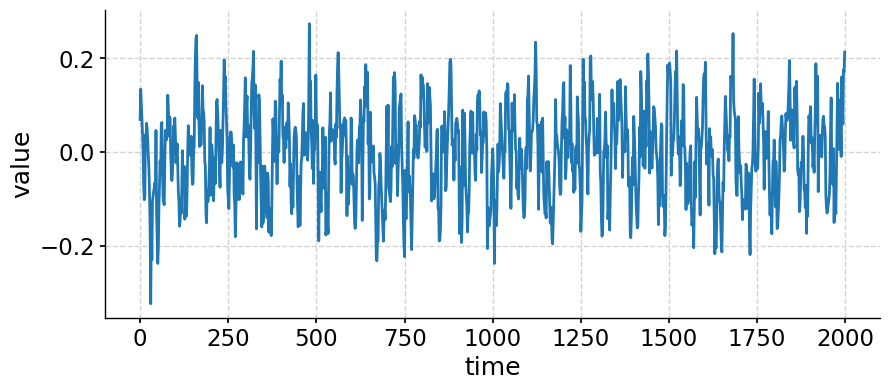

In [19]:
#%% interpolation
ts_interp=ts_outliers.interp(method='linear')
fig,ax=ts_interp.plot()

In [ ]:
### Analysis



WWZ method doesn't require require evenly-spaced data in time, and therefore  uses the detrended time series.

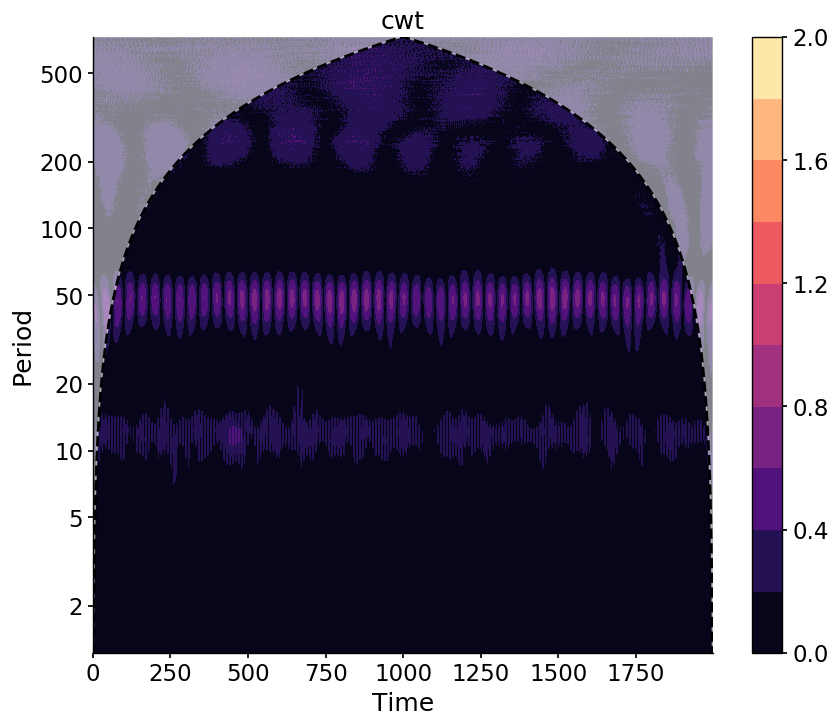

In [9]:
#%% Analysis-cwt

scales = np.arange(1, 1000) #not sure what scales to use
cwt_res=ts_interp.wavelet(method='cwt',settings={'scales':scales})
cwt_res.plot(title='cwt')
plt.show()

Performing wavelet analysis on surrogates: 100%|██████████| 200/200 [05:28<00:00,  1.64s/it]


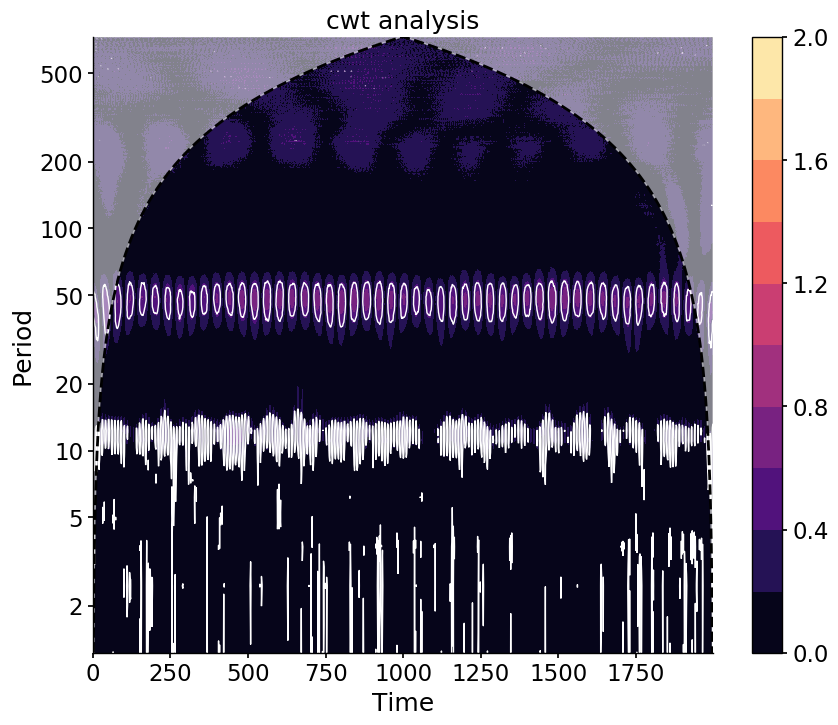

In [11]:
#%% signif test- cwt
cwt_signif=cwt_res.signif_test(qs=[0.95])
fig,ax=cwt_signif.plot(title='cwt analysis')
plt.show()

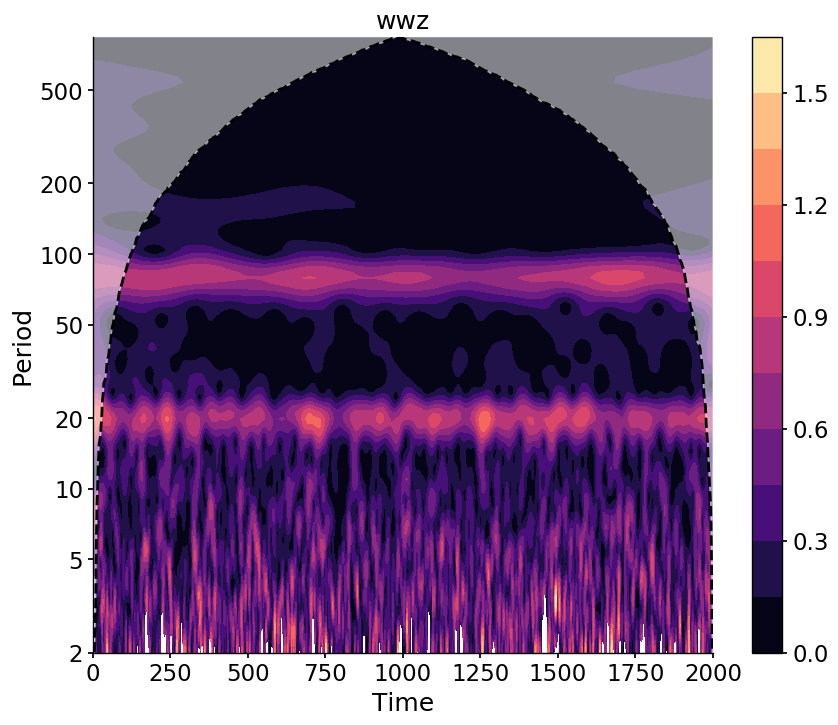

In [20]:
#%% Analysis - wwz
wwz_res=ts_detrended.wavelet(method='wwz',settings={})
wwz_res.plot(title='wwz')
plt.show()



Performing wavelet analysis on surrogates:   0%|          | 0/200 [00:00<?, ?it/s]

Performing wavelet analysis on surrogates:   0%|          | 1/200 [00:22<1:16:16, 23.00s/it]

Performing wavelet analysis on surrogates:   1%|          | 2/200 [00:45<1:15:35, 22.91s/it]

Performing wavelet analysis on surrogates:   2%|▏         | 3/200 [01:08<1:15:04, 22.87s/it]

Performing wavelet analysis on surrogates:   2%|▏         | 4/200 [01:31<1:14:47, 22.90s/it]

Performing wavelet analysis on surrogates:   2%|▎         | 5/200 [01:53<1:13:58, 22.76s/it]

Performing wavelet analysis on surrogates:   3%|▎         | 6/200 [02:16<1:13:48, 22.83s/it]

Performing wavelet analysis on surrogates:   4%|▎         | 7/200 [02:41<1:15:03, 23.33s/it]

Performing wavelet analysis on surrogates:   4%|▍         | 8/200 [03:05<1:15:54, 23.72s/it]

Performing wavelet analysis on surrogates:   4%|▍         | 9/200 [03:30<1:16:26, 24.01s/it]

Performing wavelet analysis on surrogates:   5%|▌         | 10/200 [

Performing wavelet analysis on surrogates:  82%|████████▏ | 164/200 [1:02:27<13:43, 22.88s/it]

Performing wavelet analysis on surrogates:  82%|████████▎ | 165/200 [1:02:50<13:21, 22.90s/it]

Performing wavelet analysis on surrogates:  83%|████████▎ | 166/200 [1:03:12<12:55, 22.81s/it]

Performing wavelet analysis on surrogates:  84%|████████▎ | 167/200 [1:03:35<12:32, 22.81s/it]

Performing wavelet analysis on surrogates:  84%|████████▍ | 168/200 [1:03:58<12:08, 22.77s/it]

Performing wavelet analysis on surrogates:  84%|████████▍ | 169/200 [1:04:20<11:43, 22.70s/it]

Performing wavelet analysis on surrogates:  85%|████████▌ | 170/200 [1:04:43<11:22, 22.76s/it]

Performing wavelet analysis on surrogates:  86%|████████▌ | 171/200 [1:05:06<11:00, 22.77s/it]

Performing wavelet analysis on surrogates:  86%|████████▌ | 172/200 [1:05:29<10:37, 22.76s/it]

Performing wavelet analysis on surrogates:  86%|████████▋ | 173/200 [1:05:51<10:13, 22.71s/it]

Performing wavelet analysis on surrogate

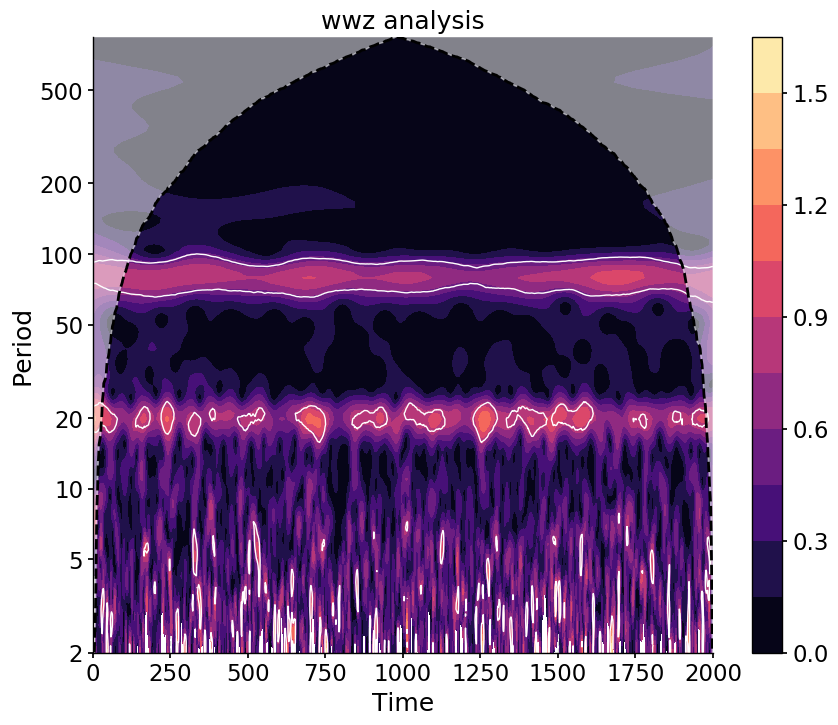

In [22]:
#%% signif test -wwz
wwz_signif=wwz_res.signif_test(qs=[0.95])
fig,ax=wwz_signif.plot(title='wwz analysis')
plt.show()